<a href="https://colab.research.google.com/github/jmpantoja/colab/blob/main/MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from re import I
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Dense

In [2]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


6


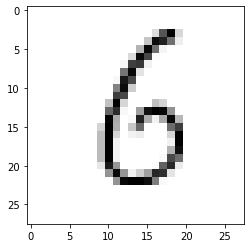

In [3]:
plt.imshow(x_train[18], cmap=plt.cm.binary)
print(y_train[18])

In [4]:
print(x_train.shape, x_train.size, x_train.ndim, x_train.dtype)

(60000, 28, 28) 47040000 3 uint8


In [5]:
#Normalización

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [6]:
print(y_test[0])
print(y_train[0])
print(y_train.shape)
print(y_test.shape)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_test[0])
print(y_train[0])
print(y_train.shape)
print(y_test.shape)

7
5
(60000,)
(10000,)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)
(10000, 10)


In [7]:
from os import name
model = Sequential(name='Modelo')
model.add(Dense(10, activation='sigmoid', input_shape=(784,), name='Input'))
model.add(Dense(10, activation='softmax', name='Output'))

model.summary()

Model: "Modelo"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 10)                7850      
                                                                 
 Output (Dense)              (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="categorical_crossentropy", 
              optimizer='sgd',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 1.8985 - accuracy: 0.5125
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2798 - accuracy: 0.7572
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9400 - accuracy: 0.8108
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7578 - accuracy: 0.8369
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6489 - accuracy: 0.8532


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss,test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.5914 - accuracy: 0.8696
0.5914488434791565 0.8695999979972839


In [39]:
# print(x_test[11].shape)
# sample = x_test[11].reshape(28, 28)

# plt.imshow(sample, cmap=plt.cm.binary)

sample = x_test[11].reshape(1, 784)

print(x_test.shape, x_test[11, :].shape, sample.shape)

predictions= model.predict(sample)
print(predictions)

(10000, 784) (784,) (1, 784)
1/1 [==============================] - 0s 21ms/step
[[0.05766242 0.03038999 0.2986399  0.02812982 0.09450933 0.04853065
  0.22613235 0.00597375 0.19471812 0.01531372]]
